# Hypothesis Testing

- Robert Yonce
- 5/11/23

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['smoker'] = df['smoker'].replace('yes', '1')
df['smoker'] = df['smoker'].replace('no', '0')
df['smoker'] = df['smoker'].astype('int')
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

# Do smokers have higher insurance charges than non-smokers?

## Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: Smokers and Non-Smokers have the same insurance charge

- Alternate Hypothesis: Smokers do have a difference in insurance charge than Non-Smokers

- alpha = .05

## Test the assumptions of your selected test

- 2 Sample T-test

In [4]:
# see how many with and without smoking

df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [5]:
# Filtering out those with and without smoking

smoker_df = df.loc[df['smoker']== 1].copy()
no_smoker_df = df.loc[df['smoker']== 0].copy()

In [6]:
# Filtering out charges for each group

smoker_charges = smoker_df['charges']
no_smoker_charges = no_smoker_df['charges']

In [7]:
# Check for outliers in weight for smoker group

zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [8]:
# check for outliers in weight for no smoker group

zscores= stats.zscore(no_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [9]:
# remove outlier for no strength group

no_smoker_charges = no_smoker_charges[(np.abs(stats.zscore(no_smoker_charges)) < 3)]

In [10]:
# test the smoker group for normality

result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [11]:
# test the non smoker group for normality

result_no_smoker_charges = stats.normaltest(no_smoker_charges)
result_no_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [12]:
# Test for equal variance

result = stats.levene(smoker_charges, no_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [13]:
# Independent t-test with equal_var set to False

result = stats.ttest_ind(smoker_charges, no_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## Interpret your p-value and reject or fail to reject your null hypothesis 

- Our P-Value is less than .05 so we will reject the null hypothesis and accept that there is a difference between smoker's charges and non-smoker's charges

## Show a supporting visualization that helps display the result

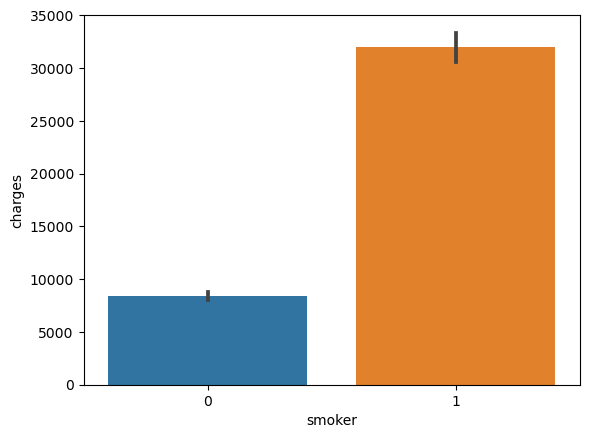

In [50]:
sns.barplot(data = df, x = 'smoker', y = 'charges')
ax.set_title('Charge for Smoker and Non Smoker')
ax.set_xlabel('Smoker')
ax.set_ylabel('Charge');

# Are men more likely to smoke than women?

## Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: Men and Women are both likely to smoke.

- Alternate Hypothesis: Men are more likely to smoke than women.

- alpha = .05

## Test the assumptions of your selected test

- Chi-Square

In [15]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,0,1
sex,,
female,547,115
male,517,159


## Interpret your p-value and reject or fail to reject your null hypothesis 

In [16]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [17]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Our P-Value is less than so we will reject the null hypothesis and accept that men are more likely to smoke than women

## Show a supporting visualization that helps display the result

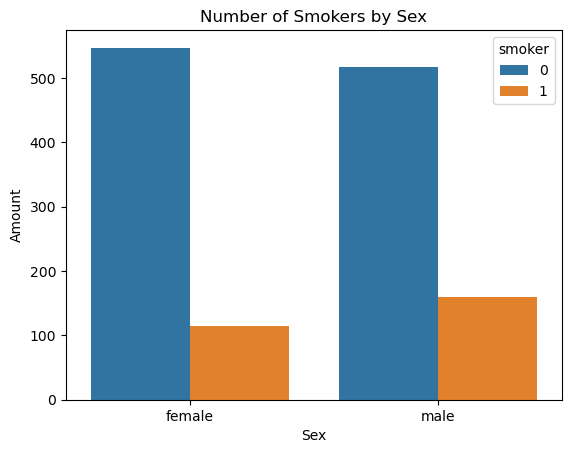

In [41]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex")
ax.set_xlabel('Sex')
ax.set_ylabel('Amount');

# Do different regions have different charges, on average?

## Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: On average, regions have the same charges.

- Alternate Hypothesis: On average, regions have different charges.

- alpha = .05

## Test the assumptions of your selected test

- Anova

In [20]:
# Create groups dictionary. There are 4 groups, but this is even more helpful when there are many groups
groups = {}
# Loop through all unique categories
for i in df['region'].unique():
    # Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [21]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [22]:
# checking sig with pandas 

norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [23]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [24]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience

result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

## Interpret your p-value and reject or fail to reject your null hypothesis 

- Based on the Krukall p-value, we fail to reject the null hypothesis since it is above .05.

## Show a supporting visualization that helps display the result

In [37]:
# Average Charge per Region

region_avg = df.groupby('region')['charges'].mean()
region_avg


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

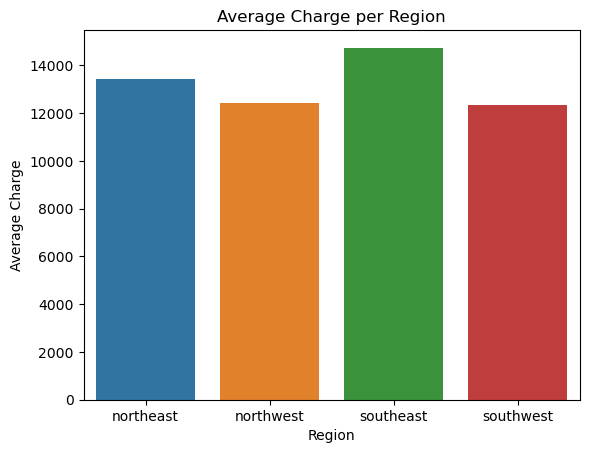

In [40]:
ax = sns.barplot(data=df, x=region_avg.index,y= region_avg.values)
ax.set_title('Average Charge per Region')
ax.set_xlabel('Region')
ax.set_ylabel('Average Charge');